In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [5]:
cv = pd.read_csv(r'D:\SIE598\Crimes2021.csv', parse_dates=['Date'])

In [6]:
cv['Year']=pd.to_datetime(cv['Date']).dt.strftime('%Y')
cv['Month']=pd.to_datetime(cv['Date']).dt.strftime('%m')
cv['Day']=pd.to_datetime(cv['Date']).dt.strftime('%d')
cv['Hour']=pd.to_datetime(cv['Date']).dt.strftime('%H')

cv['Year']=cv['Date'].dt.year
cv['Month']=cv['Date'].dt.month
cv['Week'] = cv['Date'].dt.weekday_name
cv['Weeky'] = cv['Date'].dt.weekofyear
cv['Day']=cv['Date'].dt.day

In [7]:
cv.Date

0       2021-01-03 13:23:00
1       2021-01-03 06:59:00
2       2021-01-03 00:20:00
3       2021-01-03 20:47:00
4       2021-01-03 20:09:00
                ...        
35249   2021-03-15 19:00:00
35250   2021-03-03 14:00:00
35251   2021-03-15 23:30:00
35252   2021-03-15 18:00:00
35253   2021-03-15 10:22:00
Name: Date, Length: 35254, dtype: datetime64[ns]

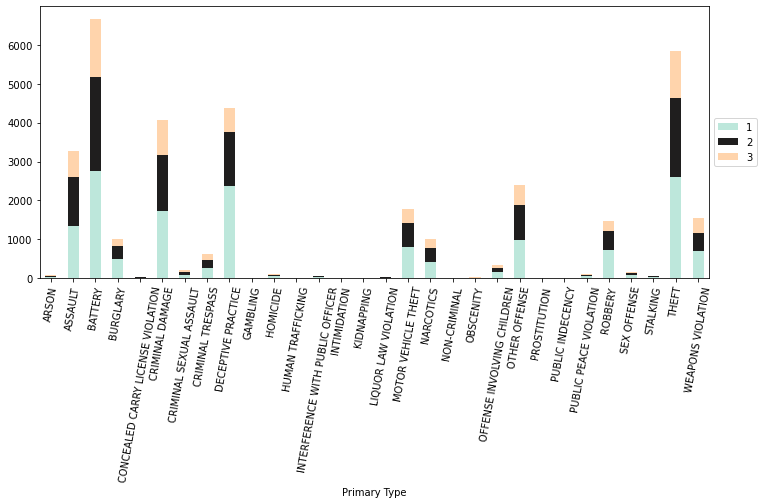

In [8]:
#Generate and graphically present a summary of the counts of Primary Type of crime by month
cv2 = cv.groupby(['Primary Type','Month']).count().reset_index()
cv2=cv2.pivot(index='Primary Type', columns='Month', values='ID')
color = sns.color_palette("icefire", as_cmap=True)
cv2.plot.bar(stacked=True, cmap=color, figsize=(12,5), rot=80).legend(loc='center left', bbox_to_anchor=(1, 0.5))

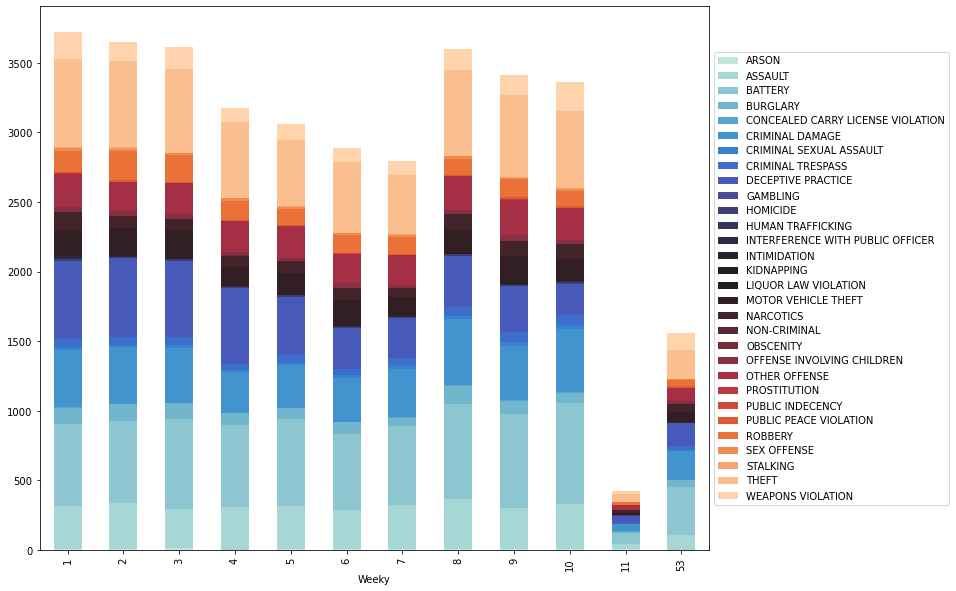

In [9]:
#Generate and graphically present a summary of the counts of Primary Type of crime by week
cv2 = cv.groupby(['Primary Type','Weeky']).count().reset_index()
cv2=cv2.pivot(index='Weeky', columns='Primary Type', values='ID')
color = sns.color_palette("icefire", as_cmap=True)

cv2.plot.bar(stacked=True,cmap=color, figsize=(12,10)).legend(loc='center left', bbox_to_anchor=(1, 0.5))

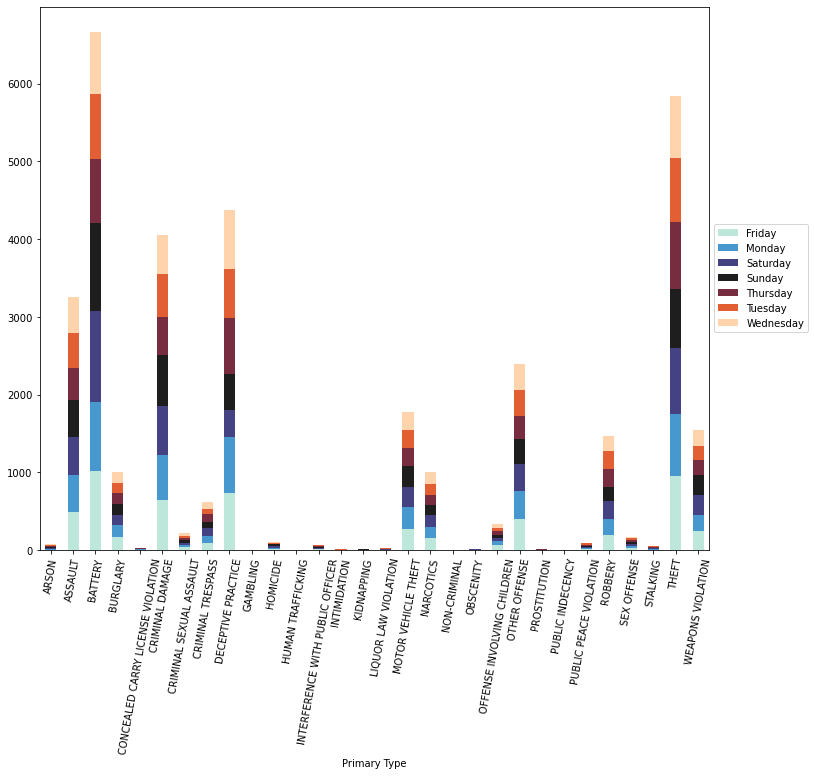

In [10]:
#Generate and graphically present a summary of the counts of Primary Type of crime by day of week (e.g Monday  through Sunday)
cv2 = cv.groupby(['Primary Type','Week']).count().reset_index()
cv2=cv2.pivot(index='Primary Type', columns='Week', values='ID')

color = sns.color_palette("icefire", as_cmap=True)

cv2.plot.bar(stacked=True,cmap=color, figsize=(12,10), rot=80).legend(loc='center left', bbox_to_anchor=(1, 0.5))

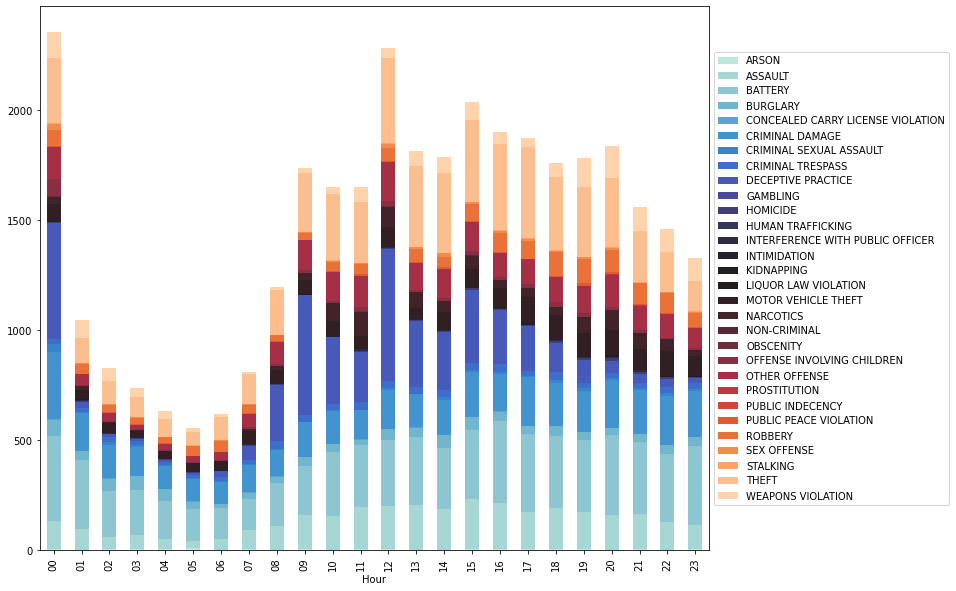

In [11]:
#Generate and graphically present a summary of counts of Primary Type of crime by hour of day.
cv2 = cv.groupby(['Primary Type','Hour']).count().reset_index()
cv2=cv2.pivot(index='Hour', columns='Primary Type', values='ID')
color = sns.color_palette("icefire", as_cmap=True)

cv2.plot.bar(stacked=True,cmap=color, figsize=(12,10)).legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [12]:
# There are a few temporal trends shown in the data - crimes overall are lower in the early hours in the morning and peak around midnight.
# Interestingly, criminal damage peaks around 9 and 12 AM. More dangerous crimes peak at night.
# Crime seems to be pretty consistent no matter what day of the week it is, with a sharp drop in February going in to March.